In [1]:
print('Start import')
import socket 
import strax
import straxen
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import pandas as pd
print(
f'''Working on {socket.getfqdn()} with the following versions 
and installation paths:
strax
\tv{strax.__version__}\t{str(strax.__path__[0])}
straxen
\tv{straxen.__version__}\t{str(straxen.__path__[0])}
''')
import peaks_utility as psu
import s2_selection_utility as ssu
from multihist import Hist1d, Histdd
import time
import itertools
import os

from scipy import stats
from straxen import units

Start import
Working on midway2-0418.rcc.local with the following versions 
and installation paths:
strax
	v0.13.2	/dali/lgrandi/strax/strax/strax
straxen
	v0.14.1	/dali/lgrandi/strax/straxen/straxen



In [2]:
st = straxen.contexts.xenonnt_online()

In [4]:
dsets = st.select_runs(exclude_tags='messy', run_mode='tpc_commissioning_kr83m*',
                       available='event_basics')

In [5]:
dsets.head(20)

,name,number,mode,start,end,tags,livetime,peak_basics_available,raw_records_available,event_basics_available
83,011682,11682,tpc_commissioning_kr83m_test_trg_4ms,2021-01-05 16:42:54.842,2021-01-05 16:52:03.978,,00:09:09.136000,True,False,True
85,011680,11680,tpc_commissioning_kr83m_test_trg_4ms,2021-01-05 16:22:29.803,2021-01-05 16:24:49.202,,00:02:19.399000,True,False,True
86,011679,11679,tpc_commissioning_kr83m_test_trg_4ms,2021-01-05 15:22:14.045,2021-01-05 16:22:15.548,,01:00:01.503000,True,False,True
87,011678,11678,tpc_commissioning_kr83m_hev,2021-01-05 15:12:54.421,2021-01-05 15:13:33.182,,00:00:38.761000,True,False,True
89,011676,11676,tpc_commissioning_kr83m_hev,2021-01-05 14:57:35.150,2021-01-05 15:12:37.156,,00:15:02.006000,True,False,True
90,011675,11675,tpc_commissioning_kr83m_test_trg_6ms,2021-01-05 14:56:21.026,2021-01-05 14:56:50.556,,00:00:29.530000,True,False,True
91,011674,11674,tpc_commissioning_kr83m_test_trg_6ms,2021-01-05 14:41:02.440,2021-01-05 14:56:03.794,,00:15:01.354000,True,False,True
92,011673,11673,tpc_commissioning_kr83m_test_trg_6ms,2021-01-05 14:25:46.167,2021-01-05 14:40:48.153,,00:15:01.986000,True,False,True
93,011672,11672,tpc_commissioning_kr83m_test_trg_4ms,2021-01-05 14:21:04.783,2021-01-05 14:23:54.663,,00:02:49.880000,True,False,True
94,011671,11671,tpc_commissioning_kr83m_test_trg_4ms,2021-01-05 14:05:45.596,2021-01-05 14:20:47.565,,00:15:01.969000,True,False,True


In [6]:
events = st.get_array('011673','event_info')

In [7]:
def plot_area_width(events,run_id, low = 0, high = 6, low2 = 1, high2 = 4.5, binning = 500):
    ph_s1 = Histdd(events['s1_area'], events['s1_range_50p_area'],
                    bins=(np.logspace(low, high, binning), np.logspace(low2, high2, binning)))
    ph_s2 = Histdd(events['s2_area'], events['s2_range_50p_area'],
                    bins=(np.logspace(low, high, binning), np.logspace(low2, high2, binning)))
    phcs1 = Histdd(events['cs1'], events['s1_range_50p_area'],
                    bins=(np.logspace(low, high, binning), np.logspace(low2, high2, binning)))
    phcs2 = Histdd(events['cs2'], events['s2_range_50p_area'],
                    bins=(np.logspace(low, high, binning), np.logspace(low2, high2, binning)))
    plt.figure(figsize=(12,6))
    ph_s1.plot(log_scale=True, cblabel='S1 events',cmap='plasma')
    ph_s2.plot(log_scale=True, cblabel='S2 events')
    plt.xlabel("peak area (PE)", ha='right', x=1)
    plt.ylabel("peak width 50% (ns)", ha='right', y=1)
    plt.title(f'run {run_id}')
    plt.xscale('log')
    plt.yscale('log')
    plt.figure(figsize=(12,6))
    phcs1.plot(log_scale=True, cblabel='S1 events',cmap='plasma')
    phcs2.plot(log_scale=True, cblabel='S2 events')
    plt.xlabel("corrected peak area (PE)", ha='right', x=1)
    plt.ylabel("peak width 50% (ns)", ha='right', y=1)
    plt.title(f'run {run_id}')
    plt.xscale('log')
    plt.yscale('log')

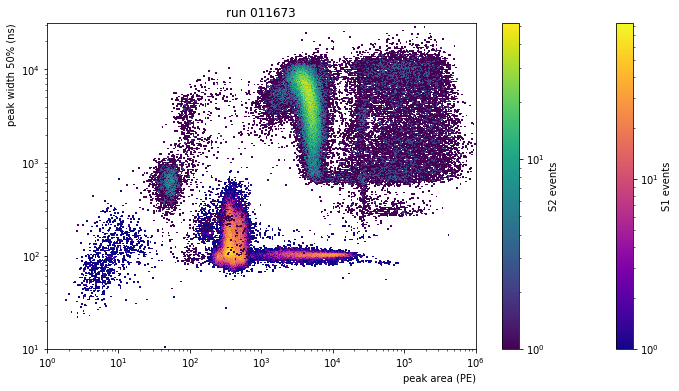

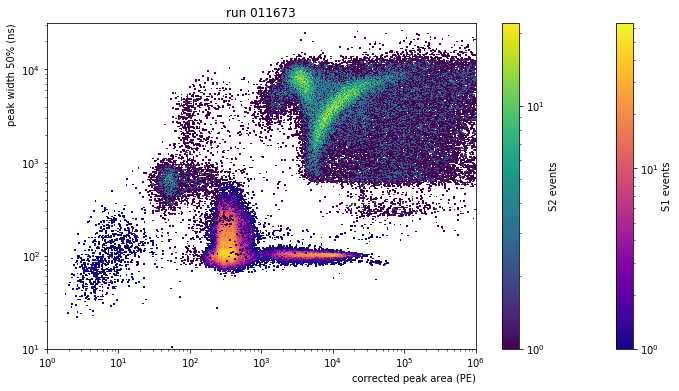

In [8]:
plot_area_width(events,'011673')

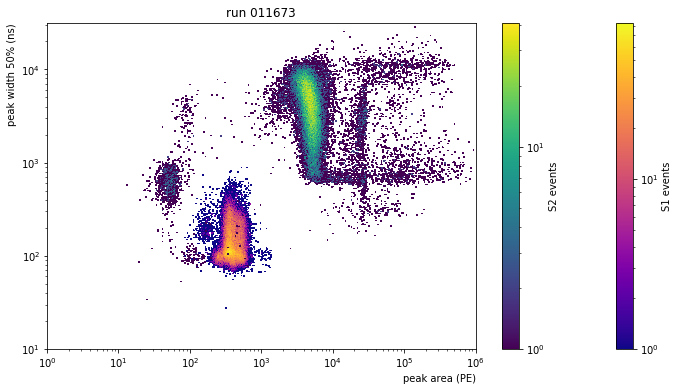

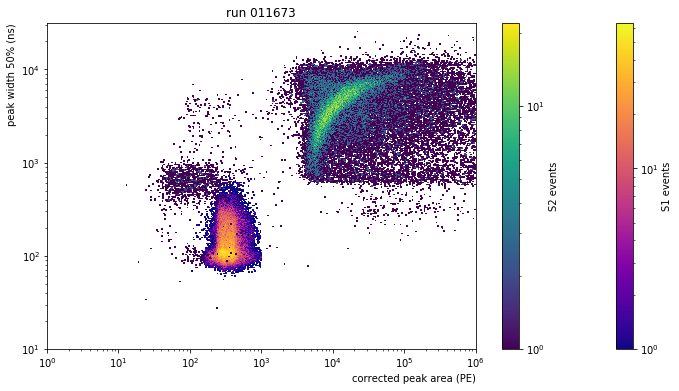

In [9]:
events_cut = events[(events['cs1']>100)&(events['cs1']<1000)]
plot_area_width(events_cut,'011673')

In [10]:
def drift_velocity(events,run_id, low = 0, high = 6000, binning = 500):
    plt.figure(figsize=(12,6))
    hdtime = Hist1d(events['drift_time']/1e3, bins=(np.linspace(low, high, binning)))
    hdtime.plot()
    plt.ylabel("events", ha='right', y=1)
    plt.xlabel("drift time ($\mu$s)", ha='right', x=1)
    plt.yscale('log')
    
    plt.figure(figsize=(12,6))
    area_ratio = np.divide(events['cs2'],events['cs1'])
    mh = Histdd(events['drift_time']/1e3, area_ratio,
            bins=(np.linspace(0, 6000, 200), np.logspace(0, 5, 200)))
    mh.plot(log_scale=True, cblabel='events')
    plt.xlabel("drift time ($\mu$s)", ha='right', x=1,fontsize=12)
    plt.ylabel("cS2/cS1", ha='right', y=1,fontsize=12)
    plt.title(f'run {run_id}',fontsize=14)
    plt.yscale('log')
    
    plt.figure(figsize=(12,6))
    mh_low = Histdd(events['drift_time']/1e3, area_ratio,
            bins=(np.linspace(0, 20, 200), np.logspace(0, 5, 200)),axis_names=['drift_time', 'area_ratio'])
    mh_low.plot(log_scale=True, cblabel='events')
    median = mh_low.percentile(50, axis='area_ratio')
    plt.xlabel("drift time ($\mu$s)", ha='right', x=1,fontsize=12)
    plt.ylabel("S2/S1", ha='right', y=1,fontsize=12)
    plt.title(f'run {run_id}',fontsize=14)
    median.plot(color='red',label='median')
    plt.yscale('log')
    plt.legend(fontsize=14)

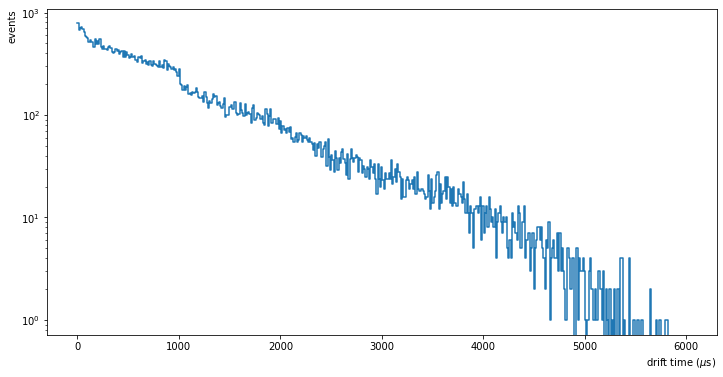

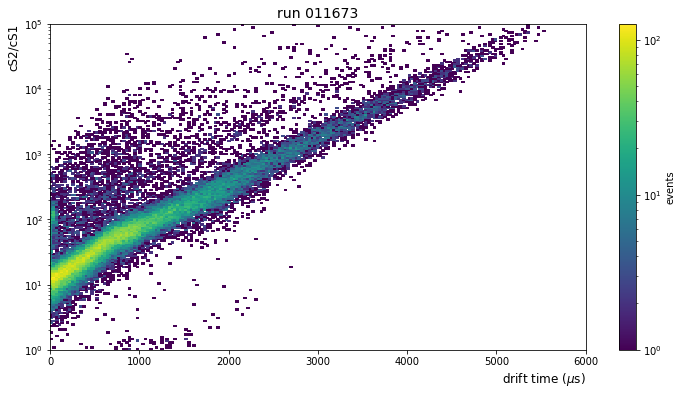

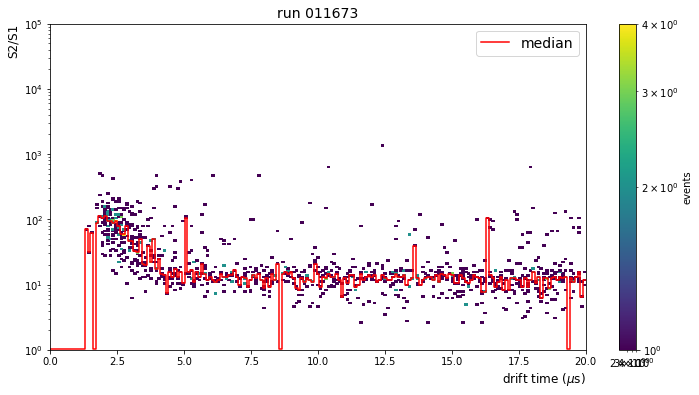

In [11]:
drift_velocity(events_cut,'011673')

In [12]:
def diffusion(t, D, vd, w0):
    sigma_to_r50p = stats.norm.ppf(0.75) - stats.norm.ppf(0.25)        
    return np.sqrt(2 * sigma_to_r50p**2 * D * t / vd**2 + w0**2)

In [56]:
def plot_widht_vs_drift_time(events,run_id, low = 0, high = 4000,
                    harea = 6, hwidth = 4.5, binning = 500):
    t = np.linspace(low, high, binning)
    phd = Histdd(events['drift_time']/1e3, events['s2_area'],
                bins=(t, np.logspace(1, harea, binning)))
    phw2 = Histdd(events['drift_time']/1e3, events['s2_range_50p_area'],
                bins=(t, np.logspace(2, hwidth, binning)))
    #plt.figure(figsize=(12,6))
    #phd.plot(log_scale=True, cblabel='events')
    #plt.xlabel("drift time ($\mu$s)", ha='right', x=1,fontsize=12)
    #plt.ylabel("S2 area (PE)", ha='right', y=1,fontsize=12)
    #plt.title(f'run {run_id}',fontsize=14)
    #plt.yscale('log')
    plt.figure(figsize=(12,6))
    phw2.plot(log_scale=True, cblabel='events')
    plt.xlabel("drift time (us)", ha='right', x=1,fontsize=12)
    plt.ylabel("S2 width 50% (ns)", ha='right', y=1,fontsize=12)
    plt.title(f'run {run_id}',fontsize=14)
    plt.yscale('log')
    
    D_guess = 40e6 * units.cm**2 / units.s
    w0_guess = 500 * units.ns
    vd = 150/2500/(units.cm/units.us)
    guess = np.array([D_guess/(units.cm**2 / units.s), vd, w0_guess])
    ys_m = diffusion(t, *guess)
    ys_u = diffusion(t, *guess) + 1000
    ys_d = diffusion(t, *guess) - 1000
    plt.plot(t, ys_d, c='r',linestyle='--')
    plt.plot(t, ys_u, c='r',linestyle='--')
    #plt.plot(t, ys_m, c='r')

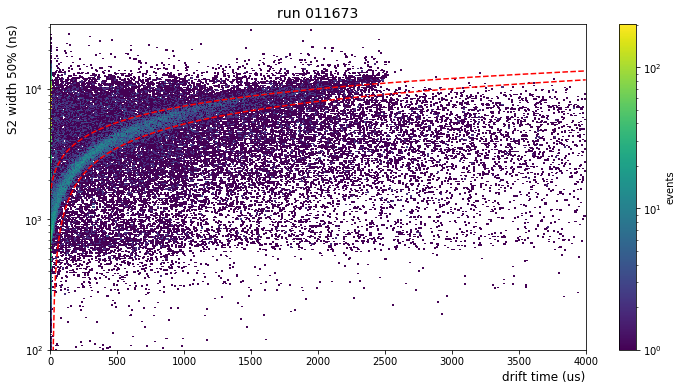

In [57]:
plot_widht_vs_drift_time(events,'011673')

In [64]:
def plot_drift_time_aft(events,run_id, low = 0, high = 6000,
                        low2 = 0, high2 = 1, binning = 500):
    x = np.linspace(low, high, binning)
    pha1 = Histdd(events['drift_time']/1e3, events['s1_area_fraction_top'],
                bins=(x, np.linspace(low2, high2, binning)))
    pha2 = Histdd(events['drift_time']/1e3, events['s2_area_fraction_top'],
                bins=(x, np.linspace(low2, high2, binning)))
    plt.figure(figsize=(12,6))
    pha1.plot(log_scale=True, cblabel='events')
    
    plt.plot(x, 0.54-2.1*x/1e4,color='r',linestyle='-')#,label='$0.54-2.1\cdot10^{-4} drifttime$')
    plt.xlabel("drift time (us)", ha='right', x=1,fontsize=12)
    plt.ylabel("S1 area fraction top", ha='right', y=1,fontsize=12)
    plt.title(f'run {run_id}',fontsize=14)
    #plt.legend()
    #plt.figure(figsize=(12,6))
    #pha2.plot(log_scale=True, cblabel='events')
    #plt.xlabel("drift time ($\mu$s)", ha='right', x=1,fontsize=12)
    #plt.ylabel("S2 area fraction top", ha='right', y=1,fontsize=12)
    #plt.title(f'run {run_id}',fontsize=14)

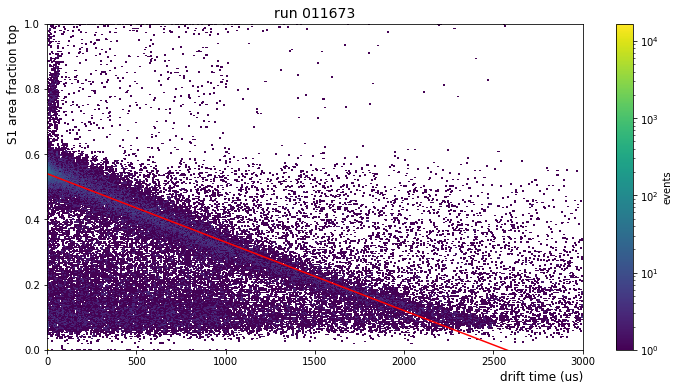

In [65]:
plot_drift_time_aft(events,'011673',0,3000)

# Diffusion Constant

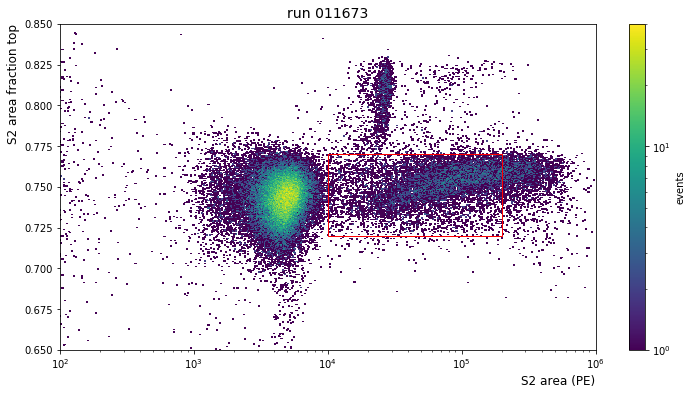

In [116]:
def diffusion_model(t, D, vd, w0):
    sigma_to_r50p = stats.norm.ppf(0.75) - stats.norm.ppf(0.25)        
    return np.sqrt(2 * sigma_to_r50p**2 * D * t / vd**2 + w0**2)

In [117]:
def fit_diffusion(drift_times, s2_50, vd, outlier_cap=-15):
    def loglikelihood(params):
        D, w0, wsigma = params
        
        # Range constraint / uniform prior. Probably not necessary anymore.
        if not (5 < D < 50 and (100  < w0/units.ns < 500) and (10 < wsigma/units.ns < 100)):
            return -float('inf')
        
        D *= (units.cm**2 / units.s)
        
        y = s2_50
        model = diffusion(drift_times, D, vd, w0)
        
        # Gaussian loglikelihood, with outlier contribution capped
        inv_sigma2 = 1.0/wsigma**2
        result = -0.5 * ((y-model)**2*inv_sigma2 - np.log(inv_sigma2))
        result = np.clip(result, outlier_cap, 1)
        return np.sum(result)
    D_guess = 30 * units.cm**2 / units.s
    w0_guess = 300 * units.ns
    wsigma_guess = 30 * units.ns
    guess = np.array([D_guess/(units.cm**2 / units.s), w0_guess, wsigma_guess])
    n_walkers = 50
    n_steps = 250
    n_dim = len(guess)
    
    # Hack to show a progress bar during the computation
    def lnprob(x):
        lnprob.t.update(1)
        return loglikelihood(x)
    lnprob.t = tqdm(desc='Computing likelihoods', total=n_walkers * n_steps)
    
    # Run the MCMC sampler
    p0 = np.array([np.random.uniform(0.9, 1.1, size=n_dim) for i in range(n_walkers)]) * guess
    sampler = emcee.EnsembleSampler(n_walkers, n_dim, lnprob)
    samples = sampler.run_mcmc(p0, n_steps)
    
    # Remove first 50 samples for each walker (burn-in)
    samples = sampler.chain.ravel()
    samples = sampler.chain[:, 50:, :].reshape((-1, n_dim))
    return samples

In [152]:
def diffusion_constant(run_id, area_bounds, aft_bounds, fit_range, low = 0, high = 2500, harea = 6, hwidth = 4.5, binning = 300):
    events = st.get_array(run_id,'event_info')
    
    # s2_area vs s2_area_fraction_top
    ph = Histdd(events['s2_area'], events['s2_area_fraction_top'],
                bins=(np.logspace(3, 6, binning), np.linspace(0.65, 0.85, binning)))
    plt.figure(figsize=(12,6))
    ph.plot(log_scale=True, cblabel='events')
    plt.xlabel("S2 area (PE)", ha='right', x=1,fontsize=12)
    plt.ylabel("S2 area fraction top", ha='right', y=1,fontsize=12)
    plt.title(f'run {run_id}',fontsize=14)
    plt.xscale('log')
    psu.rectangle(area_cut,aft_cut,'r')
    
    # cut on area & aft
    data_cut = events[(events['s2_area']>area_cut[0])&(events['s2_area']<area_cut[1])&
                       (events['s2_area_fraction_top']>aft_cut[0])&(events['s2_area_fraction_top']<aft_cut[1])]
    
    data_fit = data_cut[(data_cut['drift_time']>fit_range[0]) &
                        (data_cut['drift_time']<fit_range[1])]
        
    # s2_width_50 vs drift_time
    ts = np.linspace(low, high, binning)
    ph = Histdd(data_cut['drift_time']/1e3, data_cut['s2_range_50p_area'],
                bins=(ts, np.logspace(2, hwidth, binning)))
    plt.figure(figsize=(12,6))
    ph.plot(log_scale=True, cblabel='events')
    plt.xlabel("drift time (us)", ha='right', x=1,fontsize=12)
    plt.ylabel("S2 width 50% (ns)", ha='right', y=1,fontsize=12)
    plt.title(f'run {run_id}',fontsize=14)
    plt.yscale('log')
    plt.axvspan(*fit_range, alpha=0.1, color='blue', label='fit region')
    mean = np.array(ph.average(axis=1))
    plt.plot(ts[:len(mean)], mean, color='r', label='mean per drift time slice')
    
    D_guess = 40e6 * units.cm**2 / units.s
    w0_guess = 500 * units.ns
    vd = 150/2500/(units.cm/units.us)
    guess = np.array([D_guess/(units.cm**2 / units.s), vd, w0_guess])
    ys_m = diffusion_model(ts, *guess)
    #plt.plot(ts, ys_m, c='r',linestyle='--',label='initial guess')
    popt, pcov = curve_fit(diffusion_model,ts[:len(mean)], mean, p0=guess)
    perr = np.sqrt(np.diag(pcov))
    plt.plot(ts, diffusion_model(ts, *popt), label='fit result')
    plt.legend()
    print(f'Diffusion constant = {popt[0]:.2f} +/- {perr[0]:.2f} cm^2/s ')


Diffusion constant = 135149289.35 +/- 105882415463666.88 cm^2/s 


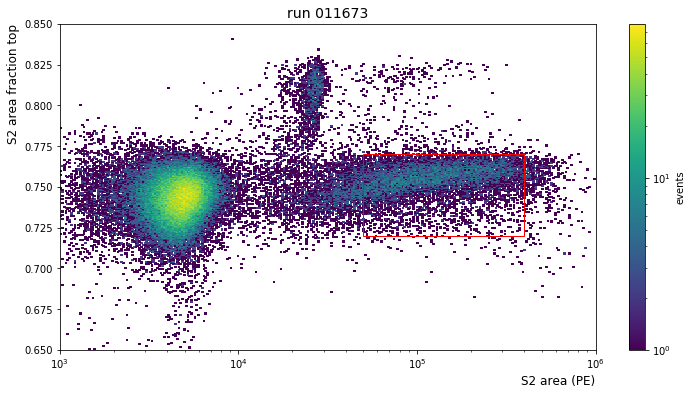

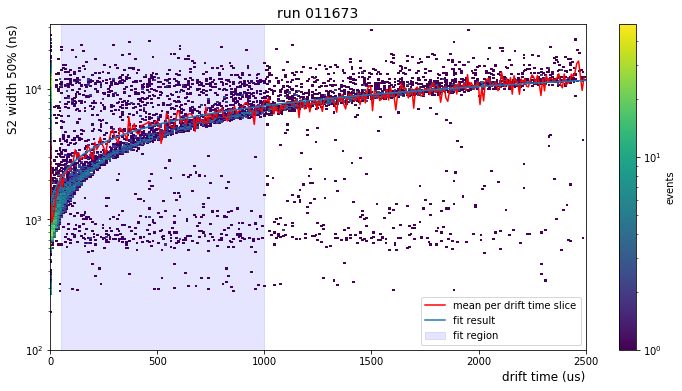

In [153]:
diffusion_constant('011673',area_bounds=(5e4,4e5),aft_bounds=(0.72,0.77),fit_range=(50,1000))